In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.patches as patches


C:\Users\balin\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
%cd OneDrive\Documents\hydro\Updated_Exercises_March_2015\Exercise 4

def tokenizer(fname):
    with open(fname) as f:
        chunk = []
        for line in f:
            if 'HEAD'in line:
                continue
            if 'END' in line:
                yield chunk
                chunk = []
                continue
            chunk.append(line)


arrays = [np.loadtxt(A) for A in tokenizer('u.dat')]

[WinError 3] The system cannot find the path specified: 'OneDrive\\Documents\\hydro\\Updated_Exercises_March_2015\\Exercise 4'
C:\Users\balin\OneDrive\Documents\hydro\Updated_Exercises_March_2015\Exercise 4


In [2]:
def readVariables():
    u = np.loadtxt('u.dat')
    w = np.loadtxt('w.dat')
    rho  = np.loadtxt('rho.dat')
    q = np.loadtxt('q.dat')
    return {'u': u,'w': w, 'rho':  rho, 'q':q}

In [3]:
def get_ith_iteration(i, variables, width = 401, length = 51):
    d = {}
    for key in variables.keys():
        d[key] = variables[key][i*length : (i+1)*length , :]
    return d


In [4]:
dictionary = readVariables()

In [15]:
null = get_ith_iteration(0, dictionary)

In [70]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

    
def plotVariables(variables, save=None, every = 5, width = 401, length = 51):
    plt.clf() 
    x = np.linspace(0, 201, width)
    y = np.linspace(0, -26, length)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(2,1,1, adjustable='box')
    ax2 = fig.add_subplot(2,1,2, adjustable = 'box')

    im = ax1.contourf(X, Y, variables['rho']+1028., alpha=0.5, cmap=cm.viridis)  
    ax1.quiver(X[::every, ::every], Y[::every, ::every], variables['u'][::every, ::every], variables['w'][::every, ::every])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    fig.colorbar(im, ax=ax1)
    ax1.set_title('Density, t = {:d} min'.format(i*5))
    
    im2 = ax2.contourf(X, Y, variables['q']*1028.*9.81, alpha=0.5, cmap=cm.viridis)  
    ax2.quiver(X[::every, ::every], Y[::every, ::every], variables['u'][::every, ::every], variables['w'][::every, ::every])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    #forceAspect(ax1,aspect=1./8.)
    #forceAspect(ax2,aspect=1./8.)
    ratio = 0.125
    #for ax in [ax1, ax2]:
    #    xmin, xmax = ax.get_xlim()
    #    ymin, ymax = ax.get_ylim()
    #    ax.set_aspect(abs((xmax-xmin)/(ymax-ymin))*ratio, adjustable='box-forced')

    fig.colorbar(im2, ax=ax2)
    ax2.set_title('Pressure anomaly')
    fig.tight_layout()
    
    if(save):
        plt.savefig(save)
    plt.close()
    

In [76]:
dictionary = readVariables()


TypeError: Input z must be at least a 2x2 array.

<Figure size 432x288 with 0 Axes>

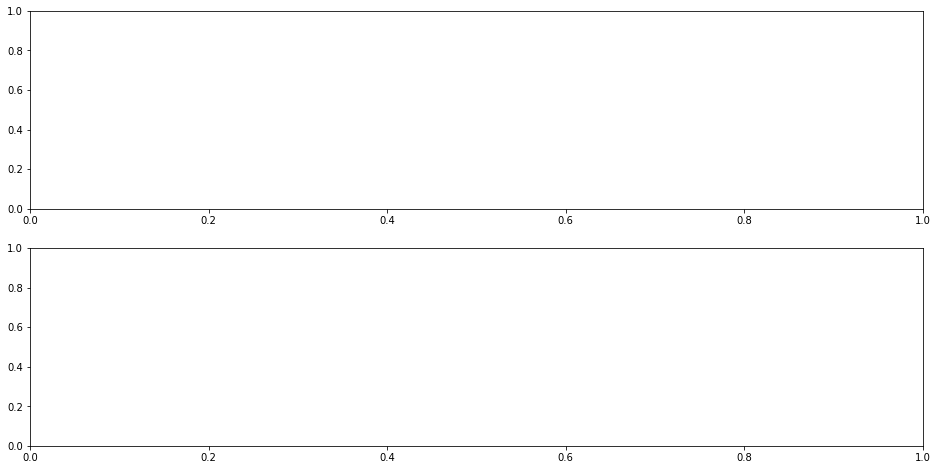

In [77]:
for i in range(500):
    
    iteration = get_ith_iteration(i, dictionary)
    plotVariables(iteration, 'pics/'+'{0:03d}'.format(i)+'.png')


In [76]:
x = np.linspace(0, 2, 101)
y = np.linspace(0, -1, 51)
X, Y = np.meshgrid(x, y)
u = np.loadtxt('w.dat')

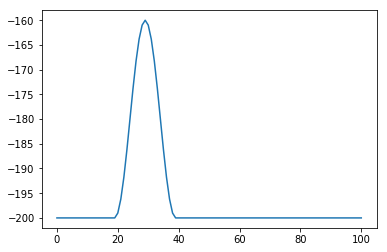

In [39]:
plt.plot(-h)